In [1]:
import nltk as n
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re, collections
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

In [2]:
dataframe=pd.read_excel("training_set_rel3.xlsx")
print(dataframe.columns.values)

['essay_id' 'essay_set' 'essay' 'rater1_domain1' 'rater2_domain1'
 'rater3_domain1' 'domain1_score' 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9'
 'Unnamed: 10' 'Unnamed: 11' 'Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14'
 'Unnamed: 15' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18' 'Unnamed: 19'
 'Unnamed: 20' 'Unnamed: 21' 'Unnamed: 22' 'Unnamed: 23' 'Unnamed: 24'
 'Unnamed: 25' 'Unnamed: 26' 'Unnamed: 27']


In [3]:
data=dataframe[['essay_set','essay','domain1_score']].copy()
print(data)

       essay_set                                              essay  \
0              1  Dear local newspaper, I think effects computer...   
1              1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2              1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3              1  Dear Local Newspaper, @CAPS1 I have found that...   
4              1  Dear @LOCATION1, I know having computers has a...   
5              1  Dear @LOCATION1, I think that computers have a...   
6              1  Did you know that more and more people these d...   
7              1  @PERCENT1 of people agree that computers make ...   
8              1  Dear reader, @ORGANIZATION1 has had a dramatic...   
9              1  In the @LOCATION1 we have the technology of a ...   
10             1  Dear @LOCATION1, @CAPS1 people acknowledge the...   
11             1  Dear @CAPS1 @CAPS2 I feel that computers do ta...   
12             1  Dear local newspaper I raed ur argument on the...   
13    

In [4]:
# Tokenize a sentence into words

def sentence_to_wordlist(input_sentence):
    
    clean_sentence = re.sub("[^a-zA-Z0-9]"," ", input_sentence)
    tokens = n.word_tokenize(clean_sentence)
    
    return tokens

In [5]:
#stop word remove
from nltk.corpus import stopwords
def remove_stop_word(word_list):
   
    stop_words = set(stopwords.words('english')) 
    
    word_tokens = n.word_tokenize(word_list) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence

In [6]:
# calculating average word length in an essay

def avg_word_len(essay):
    
    clean_essay = re.sub(r'\W', ' ', essay)
   # print()
    words = n.word_tokenize(clean_essay)
    
    return sum(len(word) for word in words) / len(words)

In [7]:
# calculating number of sentences in an essay

def sent_count(essay):
    
    sentences = n.sent_tokenize(essay)
    
    return len(sentences)

In [8]:
# calculating number of words in an essay

def word_count(essay):
    
    clean_essay = re .sub(r'\W', ' ', essay)
    words = n.word_tokenize(clean_essay)
    
    return len(words)

In [9]:
# tokenizing an essay into a list of word lists

def tokenize(essay):
    stripped_essay = essay.strip()
    
    tokenizer = n.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(stripped_essay)
    
    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            tokenized_sentences.append(sentence_to_wordlist(raw_sentence))
    
    return tokenized_sentences

In [10]:
# calculating number of nouns, adjectives, verbs and adverbs in an essay

def count_pos(essay):
    
    tokenized_sentences = tokenize(essay)
    
    noun_count = 0
    adj_count = 0
    verb_count = 0
    adv_count = 0
    
    for sentence in tokenized_sentences:
        tagged_tokens = n.pos_tag(sentence)
        
        for token_tuple in tagged_tokens:
            pos_tag = token_tuple[1]
        
            if pos_tag.startswith('N'): 
                noun_count += 1
            elif pos_tag.startswith('J'):
                adj_count += 1
            elif pos_tag.startswith('V'):
                verb_count += 1
            elif pos_tag.startswith('R'):
                adv_count += 1
            
    return noun_count, adj_count, verb_count, adv_count
    

In [11]:
# checking number of misspelled words

def count_spell_error(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
    #big.txt: It is a concatenation of public domain book excerpts from Project Gutenberg 
    #         and lists of most frequent words from Wiktionary and the British National Corpus.
    #         It contains about a million words.
    data = open('big.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if not word in word_dict:
            mispell_count += 1
           # print(word)
    
    return mispell_count

In [12]:
test=data["essay"][0]
#print(sentence_to_wordlist(test))
#print(avg_word_len(test))
#print(word_count(test))
#print(sent_count(test))
"""nn,adj,v,adv=count_pos(test)
print("no. of noun :",nn)
print("no. of adjectives:",adj)
print("no.of verb:",v)
print("no. of adverbs:",adv)"""
print(count_spell_error(test))

10


In [13]:
file=open("Society_essay.txt",'r').read()
l=remove_stop_word(file)
#print(l)
#file.close()
MyFile=open("Society_essay.txt",'w')
for element in l:
    MyFile.write(element)
    MyFile.write('\n')

    
MyFile.close()

In [14]:
def essayof_development_essay(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
  
    data = open('development_essay.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [15]:
def essayof_environment(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
   
    data = open('environment.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
           # print(word)
    
    return mispell_count

In [16]:
def essayof_ETHICS(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
    
    data = open('ETHICS.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [17]:
def essayof_Society_essay(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
  
    data = open('Society_essay.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [18]:
def essayof_social(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
  
    data = open('social.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [19]:
def essayof_res_essay(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
   
    data = open('res_essay.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [20]:
def essayof_festival_essay(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
   
    data = open('festival_essay.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [21]:
def essayof_development_essay(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
    
    data = open('development_essay.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if  word in word_dict:
            mispell_count += 1
            #print(word)
    
    return mispell_count

In [22]:
l=[]
essay=open("test.txt",'r').read()
l.append(essayof_development_essay(essay))
l.append(essayof_environment(essay))
l.append(essayof_ETHICS(essay))
l.append(essayof_festival_essay(essay))
l.append(essayof_res_essay(essay))
l.append(essayof_social(essay))
l.append(essayof_Society_essay(essay))
m=max(l)
i=l.index(m)
print(m)
print(l)
if i==0:
    print("the essay belong to development")
elif i==1:
    print("the essay belong to environment")
elif i==2:
    print("the essay belong to ethics")
elif i==3:
    print("the essay belong to festival")
elif i==4:
    print("the essay belong to reservation")
elif i==5:
    print("the essay belong to social")
elif i==6:
    print("the essay belong to society")


1624
[889, 173, 482, 602, 1624, 813, 631]
the essay belong to reservation


In [23]:
# calculating number of lemmas per essay

def count_lemmas(essay):
    
    tokenized_sentences = tokenize(essay)      
    
    lemmas = []
    wordnet_lemmatizer = WordNetLemmatizer()
    
    for sentence in tokenized_sentences:
        tagged_tokens = n.pos_tag(sentence) 
        
        for token_tuple in tagged_tokens:
        
            pos_tag = token_tuple[1]
        
            if pos_tag.startswith('N'): 
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('J'):
                pos = wordnet.ADJ
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('V'):
                pos = wordnet.VERB
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('R'):
                pos = wordnet.ADV
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            else:
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
    
    lemma_count = len(set(lemmas))
    
    return lemma_count

In [24]:
# getiing Bag of Words (BOW) counts

def get_count_vectors(essays):
    
    vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
    
    count_vectors = vectorizer.fit_transform(essays)
    
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, count_vectors

In [25]:
# extracting essay features

def extract_features(data):
    
    features = data.copy()
    
    features['char_count'] = features['essay'].apply(char_count)
    
    features['word_count'] = features['essay'].apply(word_count)
    
    features['sent_count'] = features['essay'].apply(sent_count)
    
    features['avg_word_len'] = features['essay'].apply(avg_word_len)
    
    features['lemma_count'] = features['essay'].apply(count_lemmas)
    
    features['spell_err_count'] = features['essay'].apply(count_spell_error)
    
    features['noun_count'], features['adj_count'], features['verb_count'], features['adv_count'] = zip(*features['essay'].map(count_pos))
    
    return features

In [26]:
def values(eassy):
    features={}
    #features['char_count'] = char_count(eassy)
    
    #features['word_count'] = word_count(essay)
    
    #features['sent_count'] = sent_count(essay)
    
    features['avg_word_len'] =avg_word_len(essay)
    
    features['lemma_count'] = count_lemmas(essay)
    
    features['spell_err_count'] =count_spell_error(essay)
    features['noun_count'], features['adj_count'], features['verb_count'], features['adv_count'] = count_pos(essay)
    
    
    return features
    

In [27]:
def char_count(essay):
    
    clean_essay = re.sub(r'\s', '', str(essay).lower())
    
    return len(clean_essay)

In [28]:
# extracting features from essay set 1

features_set1 = extract_features(data[data['essay_set'] == 1])

print(features_set1)
features_set1.to_csv(r'C:\Users\admin\Untitled Folder\test_case2.csv')

      essay_set                                              essay  \
0             1  Dear local newspaper, I think effects computer...   
1             1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             1  Dear Local Newspaper, @CAPS1 I have found that...   
4             1  Dear @LOCATION1, I know having computers has a...   
5             1  Dear @LOCATION1, I think that computers have a...   
6             1  Did you know that more and more people these d...   
7             1  @PERCENT1 of people agree that computers make ...   
8             1  Dear reader, @ORGANIZATION1 has had a dramatic...   
9             1  In the @LOCATION1 we have the technology of a ...   
10            1  Dear @LOCATION1, @CAPS1 people acknowledge the...   
11            1  Dear @CAPS1 @CAPS2 I feel that computers do ta...   
12            1  Dear local newspaper I raed ur argument on the...   
13            1  My 

In [29]:
features_set1.to_csv(r'C:\Users\admin\Untitled Folder\test_case5.csv')

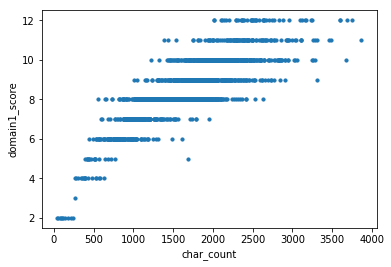

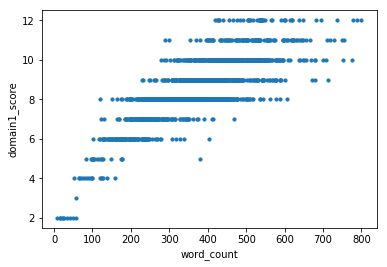

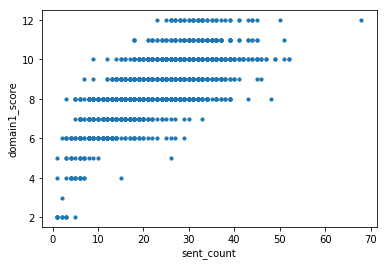

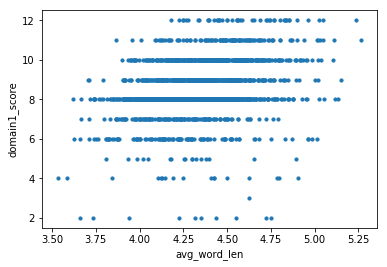

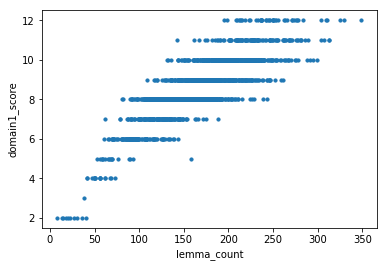

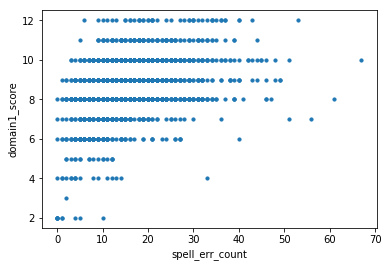

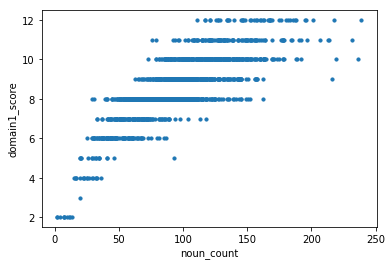

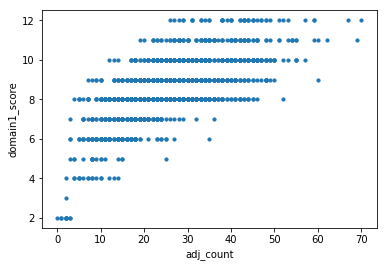

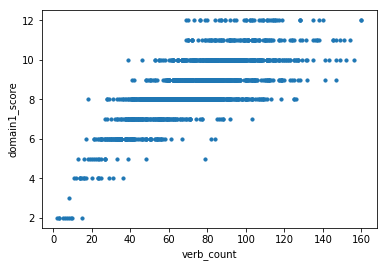

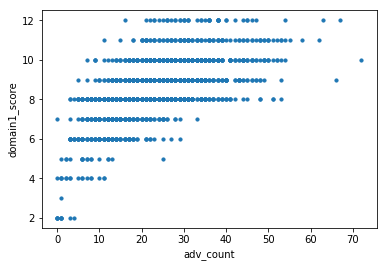

In [30]:
# Exploratory Data Analysis (EDA) on the data

%matplotlib inline
features_set1.plot.scatter(x = 'char_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'word_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'sent_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'avg_word_len', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'lemma_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'spell_err_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'noun_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'adj_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'verb_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'adv_count', y = 'domain1_score', s=10)


In [31]:
data=pd.read_csv("test_case5.csv")
data.head(20)

,Unnamed: 0,essay_set,essay,domain1_score,char_count,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,0,1,"Dear local newspaper, I think effects computer...",8.0,1538,350,16,4.237143,162,10,83,18,74,24
1,1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870,423,20,4.312057,185,24,107,19,85,19
2,2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263,283,14,4.342756,145,5,82,20,52,16
3,3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642,530,27,4.813208,236,34,178,42,97,29
4,4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105,473,30,4.334038,190,19,114,32,90,36
5,5,1,"Dear @LOCATION1, I think that computers have a...",8.0,1031,247,15,4.052632,127,15,53,12,49,17
6,6,1,Did you know that more and more people these d...,10.0,2310,508,30,4.385827,213,9,136,31,80,38
7,7,1,@PERCENT1 of people agree that computers make ...,10.0,2243,508,39,4.242126,202,14,133,32,112,29
8,8,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9.0,1960,451,35,4.190687,214,11,110,32,86,30
9,9,1,In the @LOCATION1 we have the technology of a ...,9.0,2131,519,26,3.982659,204,24,109,40,112,37


In [32]:
#print(data.columns.values)
independent_variables=data.columns
independent_variables=independent_variables.delete(0)
print(independent_variables)
independent_variables=independent_variables.delete(0)
print(independent_variables)
independent_variables=independent_variables.delete(0)
print(independent_variables)
independent_variables=independent_variables.delete(0)
#independent_variables=independent_variables.delete(9)
independent_variables=independent_variables.delete(1)
independent_variables=independent_variables.delete(0)
independent_variables

Index(['essay_set', 'essay', 'domain1_score', 'char_count', 'word_count',
       'sent_count', 'avg_word_len', 'lemma_count', 'spell_err_count',
       'noun_count', 'adj_count', 'verb_count', 'adv_count'],
      dtype='object')
Index(['essay', 'domain1_score', 'char_count', 'word_count', 'sent_count',
       'avg_word_len', 'lemma_count', 'spell_err_count', 'noun_count',
       'adj_count', 'verb_count', 'adv_count'],
      dtype='object')
Index(['domain1_score', 'char_count', 'word_count', 'sent_count',
       'avg_word_len', 'lemma_count', 'spell_err_count', 'noun_count',
       'adj_count', 'verb_count', 'adv_count'],
      dtype='object')


Index(['sent_count', 'avg_word_len', 'lemma_count', 'spell_err_count',
       'noun_count', 'adj_count', 'verb_count', 'adv_count'],
      dtype='object')

In [33]:
x=data[independent_variables]
y=data["domain1_score"]
#print(x)
dfs=pd.DataFrame(x)
dfs['domain_score']=y
print(dfs)
dfs.to_csv(r'C:\Users\admin\Untitled Folder\test_case6.csv')

      sent_count  avg_word_len  lemma_count  spell_err_count  noun_count  \
0             16      4.237143          162               10          83   
1             20      4.312057          185               24         107   
2             14      4.342756          145                5          82   
3             27      4.813208          236               34         178   
4             30      4.334038          190               19         114   
5             15      4.052632          127               15          53   
6             30      4.385827          213                9         136   
7             39      4.242126          202               14         133   
8             35      4.190687          214               11         110   
9             26      3.982659          204               24         109   
10            22      4.812121          203               14          88   
11            25      4.361596          154               35         102   
12          

In [34]:
import sklearn.linear_model as lm
lr=lm.LinearRegression()
lr.fit(x,y)
print("cofficent of determination",lr.coef_)
print("Intercept(c)",lr.intercept_)

cofficent of determination [-7.59008818e-18  6.64817908e-16 -3.07155409e-17  2.01863960e-17
  1.02350610e-16  8.02410489e-17 -2.23112129e-18 -3.67690460e-17
  1.00000000e+00]
Intercept(c) 0.0


In [35]:
#print(x)
y_pre=lr.predict(x)
y_pre

array([8., 9., 7., ..., 8., 2., 7.])

In [36]:
data["pedicted_marks"]=y_pre

In [37]:
data

,Unnamed: 0,essay_set,essay,domain1_score,char_count,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,pedicted_marks
0,0,1,"Dear local newspaper, I think effects computer...",8.0,1538,350,16,4.237143,162,10,83,18,74,24,8.0
1,1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870,423,20,4.312057,185,24,107,19,85,19,9.0
2,2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263,283,14,4.342756,145,5,82,20,52,16,7.0
3,3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642,530,27,4.813208,236,34,178,42,97,29,10.0
4,4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105,473,30,4.334038,190,19,114,32,90,36,8.0
5,5,1,"Dear @LOCATION1, I think that computers have a...",8.0,1031,247,15,4.052632,127,15,53,12,49,17,8.0
6,6,1,Did you know that more and more people these d...,10.0,2310,508,30,4.385827,213,9,136,31,80,38,10.0
7,7,1,@PERCENT1 of people agree that computers make ...,10.0,2243,508,39,4.242126,202,14,133,32,112,29,10.0
8,8,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9.0,1960,451,35,4.190687,214,11,110,32,86,30,9.0
9,9,1,In the @LOCATION1 we have the technology of a ...,9.0,2131,519,26,3.982659,204,24,109,40,112,37,9.0


In [38]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(data["domain1_score"],y_pre))



Mean squared error: 0.00


In [39]:
essay=open("test.txt",'r').read()
r=values(essay)
#print(r)
for i in independent_variables:
    r_df=pd.DataFrame(data=r,index=[0],columns=x.columns)
#print(r_df)
y=lr.predict(r_df)
y

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
l=[]
essay=open("test.txt",'r').read()
l.append(essayof_development_essay(essay))
l.append(essayof_environment(essay))
l.append(essayof_ETHICS(essay))
l.append(essayof_festival_essay(essay))
l.append(essayof_res_essay(essay))
l.append(essayof_social(essay))
l.append(essayof_Society_essay(essay))
m=max(l)
i=l.index(m)
print(m)
print(l)
if i==0:
    x="development"
elif i==1:
    x="environment"
elif i==2:
    x="ethics"
elif i==3:
    x="festival"
elif i==4:
    x="reservation"
elif i==5:
    x="social"
elif i==6:
    x="society"


In [ ]:
"""import sys
essay=sys.argv[1]
types=sys.argv[2]"""

In [ ]:
types=3
l.append(essayof_development_essay(essay))
l.append(essayof_environment(essay))
l.append(essayof_ETHICS(essay))
l.append(essayof_festival_essay(essay))
l.append(essayof_res_essay(essay))
l.append(essayof_social(essay))
l.append(essayof_Society_essay(essay))
m=max(l)
i=l.index(m)
print(m)
print(l)
if i==0:
    x="development"
elif i==1:
    x="environment"
elif i==2:
    x="ethics"
elif i==3:
    x="festival"
elif i==4:
    x="reservation"
elif i==5:
    x="social"
elif i==6:
    x="society"
if x==types:
    r=values(essay)
    #print(r)
    for i in independent_variables:
        r_df=pd.DataFrame(data=r,index=[0],columns=x.columns)
    #print(r_df)
    y=lr.predict(r_df)
    print(y)
else:
    print("The essay is on worng topic")
    r=values(essay)
    #print(r)
    for i in independent_variables:
        r_df=pd.DataFrame(data=r,index=[0],columns=x.columns)
    #print(r_df)
    y=lr.predict(r_df)
    print(y)
    